In [1]:
import pandas as pd
import numpy as np
import torch

#### Проверим доступен ли нам GPU

In [3]:
display(torch.cuda.is_available())
display(torch.cuda.get_device_name())

True

'NVIDIA GeForce RTX 3050 Ti Laptop GPU'

#### Динамический выбор работы на GPU или CPU

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [29]:
display('-> 1. Создание входов модели: ')
x = torch.rand(5)
display(x)

display('-> 2. Первый полносвязный слой z, Расчет весов: ')
w = torch.rand(3, 5, requires_grad=True)
display(w)

display('-> 3. Слой z: ')
z = torch.empty(3)
display(z)

display('-> 4. Расчет выходов слоя z в цикле for i in range(3): z[i] = torch.sum(w[i] * x): ')
for i in range(3):
    z[i] = torch.sum(w[i] * x)

display(z)

display('Альтернативный расчет переменожения матриц через z = torch.matmul(x, w.t()): ')
z = torch.matmul(x, w.t())
display(z)

display('Создание второго полносвязного слоя v: ')
v = torch.rand(3, requires_grad=True)
display(v)

display('Расчитаем выход y: ')
y = torch.sum(z * v)
display(y.item())

display('Имеем выход y, тогда посчитаем ошибку, например MSE (при y_true = 2): ')
loss = torch.mean((y - 2) ** 2)
display(loss)

display('Посмотрим на все наши тензоры: ')

display('Подсчитываем градиенты (веса) с помощью обратного распространения ошибки: ')
loss.backward()
display('Подсчитанные веса слоев: ')
display('Веса слоя z: ')
display(w.grad)
display('Веса слоя v: ')
display(v.grad)

'-> 1. Создание входов модели: '

tensor([0.3896, 0.4466, 0.7356, 0.5939, 0.7889])

'-> 2. Первый полносвязный слой z, Расчет весов: '

tensor([[0.4897, 0.6028, 0.5793, 0.2459, 0.5138],
        [0.3585, 0.2661, 0.0384, 0.5906, 0.7910],
        [0.8574, 0.7887, 0.1079, 0.7745, 0.2569]], requires_grad=True)

'-> 3. Слой z: '

tensor([0.0000, 4.4766, 1.6111])

'-> 4. Расчет выходов слоя z в цикле for i in range(3): z[i] = torch.sum(w[i] * x): '

tensor([1.4374, 1.2614, 1.4282], grad_fn=<CopySlices>)

'Альтернативный расчет переменожения матриц через z = torch.matmul(x, w.t()): '

tensor([1.4374, 1.2614, 1.4282], grad_fn=<SqueezeBackward4>)

'Создание второго полносвязного слоя v: '

tensor([0.3405, 0.7155, 0.4831], requires_grad=True)

'Расчитаем выход y: '

2.0820608139038086

'Имеем выход y, тогда посчитаем ошибку, например MSE (при y_true = 2): '

tensor(0.0067, grad_fn=<MeanBackward0>)

'Посмотрим на все наши тензоры: '

'Подсчитываем градиенты (веса) с помощью обратного распространения ошибки: '

'Подсчитанные веса слоев: '

'Веса слоя z: '

tensor([[0.0218, 0.0250, 0.0411, 0.0332, 0.0441],
        [0.0457, 0.0524, 0.0864, 0.0697, 0.0926],
        [0.0309, 0.0354, 0.0583, 0.0471, 0.0625]])

'Веса слоя v: '

tensor([0.2359, 0.2070, 0.2344])

In [44]:
with torch.no_grad(): ## with no_grad() - не считаются градиенты внутри контекстного окна
    a = torch.rand(3, 5, requires_grad=True)
    b = torch.rand(3, 5, requires_grad=True)
    loss1 = torch.sum(a + b)
    
loss2 = torch.sum(a + b)
loss2.backward()
    
display(loss2)
display(a.grad)
display(b.grad)

tensor(11.8463, grad_fn=<SumBackward0>)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [43]:
with torch.inference_mode(): ## with inference_mode() - градиенты никогда не считаются
    a = torch.rand(3, 5, requires_grad=True)
    b = torch.rand(3, 5, requires_grad=True)
    loss1 = torch.sum(a + b)
    
display(a.grad)
display(b.grad)

None

None

In [48]:
@torch.no_grad() ### Декораторы для no_grad() или inference_mode()
def foo():
    a = torch.rand(3, 5, requires_grad=True)
    b = torch.rand(3, 5, requires_grad=True)

    return a, b

a, b = foo()
torch.mean(a - b)

tensor(0.0516, grad_fn=<MeanBackward0>)

In [49]:
### метод для включения / выключения подсчета градиентов у тензоров 
a.requires_grad = True
b.requires_grad = False

#### Полносвязные слои и функции активации 

In [50]:
from torch import nn 

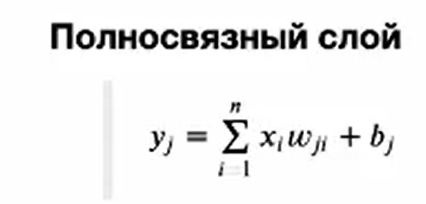

In [55]:
layer = nn.Linear(in_features=5, out_features=3)
display('Созданные веса слоя: ')
display(layer.weight)
display('Созданные свободные члены: ')
display(layer.bias)

'Созданные веса слоя: '

Parameter containing:
tensor([[-0.1726,  0.4363,  0.0207, -0.2426, -0.0412],
        [ 0.1178,  0.2506, -0.2965,  0.3456, -0.3661],
        [-0.2049, -0.3478, -0.1446, -0.1189,  0.0503]], requires_grad=True)

'Созданные свободные члены: '

Parameter containing:
tensor([ 0.4344, -0.4442, -0.1052], requires_grad=True)

In [59]:
x = torch.randn(5)
display(layer(x))

tensor([ 1.0424, -0.7075, -0.8544], grad_fn=<ViewBackward0>)

#### Функции активации

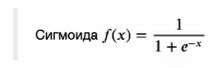

In [67]:
activation = nn.Sigmoid()

x = torch.randn(5)
display(x)
display(activation(x))

tensor([-0.5646,  0.6940,  1.7057, -0.4558, -1.2133])

tensor([0.3625, 0.6668, 0.8463, 0.3880, 0.2291])

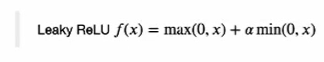

In [68]:
activation = nn.ReLU()

x = torch.randn(5)
display(x)
display(activation(x))

tensor([ 0.9258, -0.0070,  0.2757,  1.9931,  0.8705])

tensor([0.9258, 0.0000, 0.2757, 1.9931, 0.8705])

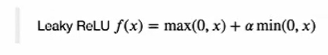

In [70]:
activation = nn.LeakyReLU(negative_slope=0.001)

x = torch.randn(5)
display(x)
display(activation(x))

tensor([ 0.6922, -1.6136, -0.0471,  1.5036, -0.4662])

tensor([ 6.9221e-01, -1.6136e-03, -4.7128e-05,  1.5036e+00, -4.6616e-04])

#### Градиентный спуск

In [73]:
n_features = 2
n_objects = 300

torch.manual_seed(0)

w_true = torch.randn(n_features) # веса 
b_true = torch.randn(1) # биас

x = (torch.rand(n_objects, n_features) - 0.5) * 10 * (torch.arange(n_features) * 2 + 1)
y = torch.matmul(x, w_true) + torch.randn(n_objects) + b_true

In [71]:
n_steps = 200
step_size = 1e-2

In [76]:
w = torch.rand(n_features, requires_grad=True)
b = torch.rand(1, requires_grad=True)

for i in range(n_steps):
    y_pred = torch.matmul(x, w) + b

    mse = torch.mean((y_pred - y) ** 2)

    if i < 20 or i % 10 == 0:
        print(f'MSE на шаге {i + 1} {mse.item():.5f}')

    mse.backward()

    with torch.no_grad():
        w -= w.grad * step_size
        b -= b.grad * step_size

    w.grad.zero_()
    b.grad.zero_()

MSE на шаге 1 130.75197
MSE на шаге 2 53.79208
MSE на шаге 3 27.54351
MSE на шаге 4 17.58543
MSE на шаге 5 13.15989
MSE на шаге 6 10.80943
MSE на шаге 7 9.35913
MSE на шаге 8 8.36826
MSE на шаге 9 7.64593
MSE на шаге 10 7.09519
MSE на шаге 11 6.65989
MSE на шаге 12 6.30461
MSE на шаге 13 6.00597
MSE на шаге 14 5.74817
MSE на шаге 15 5.52038
MSE на шаге 16 5.31513
MSE на шаге 17 5.12724
MSE на шаге 18 4.95309
MSE на шаге 19 4.79012
MSE на шаге 20 4.63651
MSE на шаге 21 4.49096
MSE на шаге 31 3.34447
MSE на шаге 41 2.58160
MSE на шаге 51 2.06947
MSE на шаге 61 1.72556
MSE на шаге 71 1.49461
MSE на шаге 81 1.33952
MSE на шаге 91 1.23537
MSE на шаге 101 1.16543
MSE на шаге 111 1.11847
MSE на шаге 121 1.08693
MSE на шаге 131 1.06575
MSE на шаге 141 1.05153
MSE на шаге 151 1.04197
MSE на шаге 161 1.03556
MSE на шаге 171 1.03125
MSE на шаге 181 1.02836
MSE на шаге 191 1.02642


In [79]:
layer = nn.Linear(in_features=n_features, out_features=1)

for i in range(n_steps):
    y_pred = layer(x).ravel()

    mse = torch.mean((y_pred - y) ** 2)

    if i < 20 or i % 10 == 0:
        print(f'MSE на шаге {i + 1} {mse.item():.5f}')

    mse.backward()

    with torch.no_grad():
        layer.weight -= layer.weight.grad * step_size
        layer.bias -= layer.bias.grad * step_size

    #layer.weight.grad.zero_()
    #layer.bias.grad.zero_()

    layer.zero_grad()

MSE на шаге 1 28.00511
MSE на шаге 2 18.32802
MSE на шаге 3 13.78828
MSE на шаге 4 11.26644
MSE на шаге 5 9.67071
MSE на шаге 6 8.57205
MSE на шаге 7 7.77375
MSE на шаге 8 7.17067
MSE на шаге 9 6.69975
MSE на шаге 10 6.32047
MSE на шаге 11 6.00582
MSE на шаге 12 5.73747
MSE на шаге 13 5.50286
MSE на шаге 14 5.29334
MSE на шаге 15 5.10291
MSE на шаге 16 4.92739
MSE на шаге 17 4.76383
MSE на шаге 18 4.61016
MSE на шаге 19 4.46489
MSE на шаге 20 4.32693
MSE на шаге 21 4.19549
MSE на шаге 31 3.14931
MSE на шаге 41 2.45062
MSE на шаге 51 1.98151
MSE на шаге 61 1.66649
MSE на шаге 71 1.45495
MSE на шаге 81 1.31289
MSE на шаге 91 1.21749
MSE на шаге 101 1.15342
MSE на шаге 111 1.11040
MSE на шаге 121 1.08151
MSE на шаге 131 1.06211
MSE на шаге 141 1.04908
MSE на шаге 151 1.04033
MSE на шаге 161 1.03446
MSE на шаге 171 1.03051
MSE на шаге 181 1.02786
MSE на шаге 191 1.02608


In [80]:
n_features = 5
n_objects = 300

torch.manual_seed(0)

w_true = torch.randn(n_features)

x = (torch.rand(n_objects, n_features) - 0.5) * 10 * (torch.arange(n_features) * 2 + 1)
y = torch.matmul(x, w_true) + torch.randn(n_objects) + b_true

In [84]:
n_steps = 2000
step_size = 1e-3

In [85]:
layer = nn.Linear(in_features=n_features, out_features=1)

for i in range(n_steps):
    y_pred = layer(x).ravel()

    mse = torch.mean((y_pred - y) ** 2)

    if i < 20 or i % 50 == 0:
        print(f'MSE на шаге {i + 1} {mse.item():.5f}')

    mse.backward()

    with torch.no_grad():
        layer.weight -= layer.weight.grad * step_size
        layer.bias -= layer.bias.grad * step_size

    layer.zero_grad()

MSE на шаге 1 1414.86731
MSE на шаге 2 419.86896
MSE на шаге 3 159.62801
MSE на шаге 4 74.67896
MSE на шаге 5 44.89977
MSE на шаге 6 33.82288
MSE на шаге 7 29.31109
MSE на шаге 8 27.15300
MSE на шаге 9 25.85730
MSE на шаге 10 24.89039
MSE на шаге 11 24.06001
MSE на шаге 12 23.29631
MSE на шаге 13 22.57343
MSE на шаге 14 21.88140
MSE на шаге 15 21.21599
MSE на шаге 16 20.57511
MSE на шаге 17 19.95743
MSE на шаге 18 19.36193
MSE на шаге 19 18.78776
MSE на шаге 20 18.23408
MSE на шаге 51 8.07849
MSE на шаге 101 3.75577
MSE на шаге 151 2.76450
MSE на шаге 201 2.35355
MSE на шаге 251 2.07960
MSE на шаге 301 1.86465
MSE на шаге 351 1.68972
MSE на шаге 401 1.54632
MSE на шаге 451 1.42860
MSE на шаге 501 1.33195
MSE на шаге 551 1.25258
MSE на шаге 601 1.18741
MSE на шаге 651 1.13389
MSE на шаге 701 1.08995
MSE на шаге 751 1.05386
MSE на шаге 801 1.02423
MSE на шаге 851 0.99990
MSE на шаге 901 0.97992
MSE на шаге 951 0.96351
MSE на шаге 1001 0.95004
MSE на шаге 1051 0.93898
MSE на шаге 1101 0.9

In [96]:
n_steps = 2000
step_size = 1e-4

In [97]:
layer1 = nn.Linear(in_features=n_features, out_features=3)
layer2 = nn.Linear(in_features=3, out_features=1)

for i in range(n_steps):
    y_pred = layer2(activation(layer1(x))).ravel()

    mse = torch.mean((y_pred - y) ** 2)

    if i < 20 or i % 50 == 0:
        print(f'MSE на шаге {i + 1} {mse.item():.5f}')

    mse.backward()

    with torch.no_grad():
        layer1.weight -= layer1.weight.grad * step_size
        layer1.bias -= layer1.bias.grad * step_size
        layer2.weight -= layer2.weight.grad * step_size
        layer2.bias -= layer2.bias.grad * step_size

    layer1.zero_grad()
    layer2.zero_grad()

MSE на шаге 1 1780.34583
MSE на шаге 2 1759.66711
MSE на шаге 3 1736.87573
MSE на шаге 4 1711.84949
MSE на шаге 5 1684.11829
MSE на шаге 6 1653.97583
MSE на шаге 7 1620.71631
MSE на шаге 8 1584.32629
MSE на шаге 9 1544.63318
MSE на шаге 10 1501.49707
MSE на шаге 11 1454.92859
MSE на шаге 12 1404.15515
MSE на шаге 13 1349.43018
MSE на шаге 14 1291.54919
MSE на шаге 15 1230.02795
MSE на шаге 16 1165.01953
MSE на шаге 17 1097.35339
MSE на шаге 18 1027.20789
MSE на шаге 19 955.09198
MSE на шаге 20 881.48773
MSE на шаге 51 90.35655
MSE на шаге 101 26.31942
MSE на шаге 151 20.26344
MSE на шаге 201 16.39713
MSE на шаге 251 13.51998
MSE на шаге 301 11.24228
MSE на шаге 351 9.39198
MSE на шаге 401 7.88549
MSE на шаге 451 6.66769
MSE на шаге 501 5.67759
MSE на шаге 551 4.86285
MSE на шаге 601 4.21389
MSE на шаге 651 3.69211
MSE на шаге 701 3.27250
MSE на шаге 751 2.93601
MSE на шаге 801 2.66702
MSE на шаге 851 2.45281
MSE на шаге 901 2.28206
MSE на шаге 951 2.14603
MSE на шаге 1001 2.03749
MSE н